c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
GMM Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Evaluation of K-Means with ground truth classification of Iris Dataset
Rand Index:0.730238 
Homogenity Score:0.751485 
Completeness Score:0.764986 
V-Measure:0.758176 
Evaluation of GMM with ground truth classification of Iris Dataset
Rand Index:0.903874 
Homogenity Score:0.898326 
Completeness Score:0.901065 
V-Measure:0.899694 


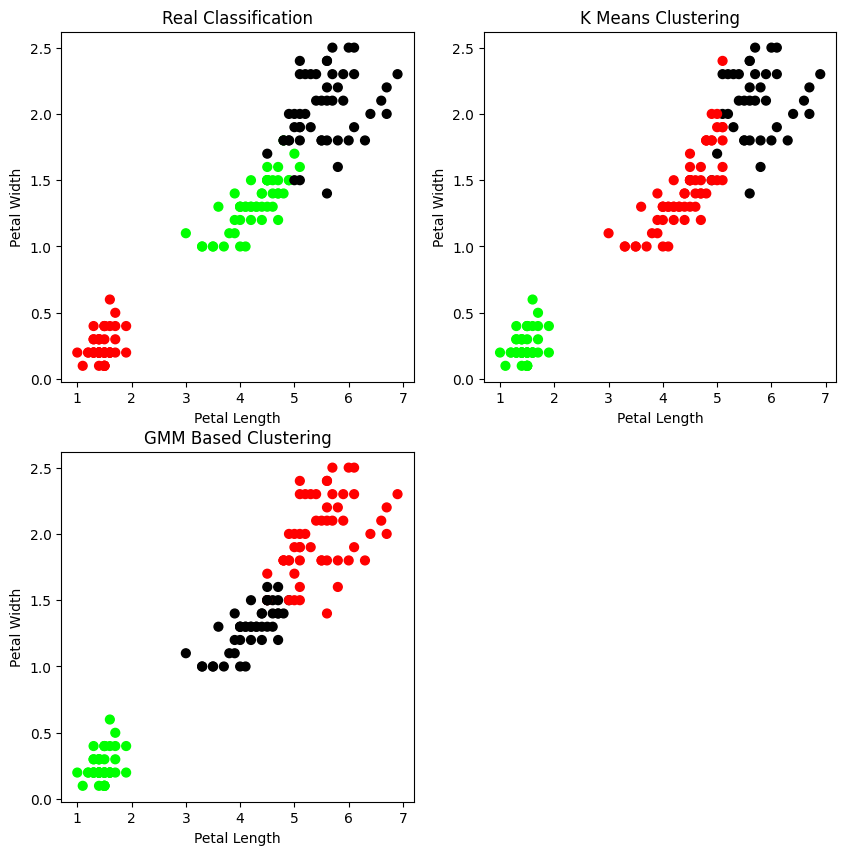

In [2]:
# EM Algorithm

import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm
import pandas as pd 
import numpy as np 

irisDataset = pd.read_csv('iris.csv')
irisDataset['Targets'] = irisDataset.Class.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
X = irisDataset[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']]
Y = irisDataset[['Targets']]

#Build Kmeans model
model = KMeans(n_clusters=3)
model.fit(X)
print('Model Labels:\n',model.labels_)
#Build GMM for EM Algorithm
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xs = scaler.transform(X)
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
Y_gmm = gmm.predict(xs)
print('GMM Labels:\n',Y_gmm)

#Visualize Results
plt.figure(figsize=(10,10))
#Create colormap
colormap = np.array(['red','lime','black'])

def plotGraph(i,label,title):
    plt.subplot(2,2,i)
    plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[label],s=40)
    plt.title(title)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')

plotGraph(1,Y.Targets,"Real Classification")
plotGraph(2,model.labels_,"K Means Clustering")
plotGraph(3,Y_gmm,"GMM Based Clustering")

#Calculate performance metrics for K-Means and GMM
def calcPerformance(title,label):
    print('Evaluation of '+title+' with ground truth classification of Iris Dataset') 
    print('Rand Index:%f ' % sm.adjusted_rand_score(Y.Targets, label )) 
    print('Homogenity Score:%f ' % sm.homogeneity_score(Y.Targets, label ))
    print('Completeness Score:%f ' % sm.completeness_score(Y.Targets, label ))
    print('V-Measure:%f ' % sm.v_measure_score(Y.Targets, label ))

calcPerformance("K-Means",model.labels_)
calcPerformance("GMM",Y_gmm)




